In [230]:
import pandas  as pd
import numpy   as np
import math
from   keras.models import Sequential
from   keras.layers import Dense 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [231]:
df = pd.read_csv("VCB.csv")

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1374 non-null   object
 1   Close     1374 non-null   int64 
 2   Open      1374 non-null   int64 
 3   High      1374 non-null   int64 
 4   Low       1374 non-null   int64 
 5   Vol.      1374 non-null   object
 6   Change %  1374 non-null   object
dtypes: int64(4), object(3)
memory usage: 75.3+ KB


In [233]:
df.describe()

,Close,Open,High,Low
count,1374.000000,1374.000000,1374.000000,1374.000000
mean,66131.355895,66076.817322,66911.454876,65262.825328
std,15294.539296,15301.598532,15435.499982,15120.524067
min,33360.000000,33360.000000,34194.000000,31540.000000
25%,51989.000000,51912.000000,52545.250000,51340.250000
50%,67639.000000,67578.000000,68038.000000,66810.000000
75%,77342.000000,77264.000000,78500.000000,76335.000000
max,99000.000000,99000.000000,99000.000000,97000.000000


In [234]:
#gắng index với giá Close
df1=df.reset_index()['Close']

In [235]:
df1

0       36620
1       37454
2       36468
3       36392
4       36089
        ...  
1369    93900
1370    94900
1371    98000
1372    99000
1373    97000
Name: Close, Length: 1374, dtype: int64

In [236]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [237]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [238]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [239]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [240]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [241]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1))

In [242]:
model.compile(loss='mean_squared_error', optimizer='sgd')



In [243]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 28ms/step - loss: 0.0455 - val_loss: 0.0039
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 8/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0053
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 84/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 85/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0033
Epoch 86/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 87/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 88/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 89/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 90/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 91/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0031
Epoch 92/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 93/100


In [244]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 0s/step


In [245]:
print(len(y_train), len(y_pred))
print(len(ytest), len(y_pred_val))


860 173
173 38


In [246]:
print(y_train.shape[0], y_pred.shape[0])
print(ytest.shape[0], y_pred_val.shape[0])


860 173
173 38


In [247]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Áp dụng fit_transform cho y_train
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Áp dụng transform cho y_test và train_predict
y_test_scaled = scaler.transform(ytest.reshape(-1, 1))
train_predict_scaled = scaler.transform(train_predict.reshape(-1, 1))

# Áp dụng inverse_transform để chuẩn hóa lại
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))
train_predict = scaler.inverse_transform(train_predict_scaled.reshape(-1, 1))



In [248]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [249]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Training RMSE:', train_rmse)

Validation RMSE: 0.23254299710586698
Testing RMSE: 0.15953438309847487
Training RMSE: 0.25005372881441223


In [250]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_val = mean_absolute_percentage_error(yval, y_pred_val)
mape_test = mean_absolute_percentage_error(ytest, y_pred)
mape_train = mean_absolute_percentage_error(y_train, train_predict)


print('Training MAPE:', mape_train)
print('Testing MAPE:', mape_test)
print('Validation MAPE:', mape_val)



Training MAPE: 67.90496990539762
Testing MAPE: 20.18889098138585
Validation MAPE: 25.541250812380902


In [251]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae_val = mean_absolute_error(yval, y_pred_val)
mae_test = mean_absolute_error(ytest, y_pred)
mae_train = mean_absolute_error(y_train,train_predict)

print('Validation MAE:', mae_val)
print('Testing MAE:', mae_test)
print('Trainning MAE:', mae_train)



Validation MAE: 0.22776479546665662
Testing MAE: 0.14005789295267607
Trainning MAE: 0.20437089640663547


In [252]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.02054714190686771


In [253]:
def predict_30_days_nnar(model, data, time_step):
    x_input = data[-time_step:].reshape(1, -1)  # Lấy dữ liệu cuối cùng để dự đoán
    temp_input = list(x_input)
    lst_output = []

    for i in range(30):
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, time_step, 1)
            yhat = model.predict(x_input)
            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]
            lst_output.append(yhat[0][0])
        else:
            x_input = x_input.reshape(1, time_step, 1)
            yhat = model.predict(x_input)
            temp_input.extend(yhat.tolist())
            lst_output.append(yhat[0][0])

    return lst_output

# Dự đoán 30 ngày tiếp theo cho dữ liệu test_data với mô hình NNAR
prediction_nnar = predict_30_days_nnar(model, test_data, time_step)
print("Giá dự đoán 30 ngày sau:", prediction_nnar)


1/1 [==============================] - 0s 31ms/step
Giá dự đoán 30 ngày sau: [0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074, 0.580074]


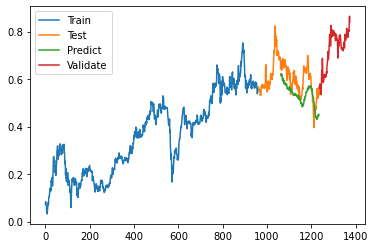

In [254]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()